In [1]:
import pandas as pd

data = pd.read_csv('diabetes.csv')

data.head()

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print(data.isnull().sum())

-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
0             0
0.00149028    0
-0.53117      0
-0.0333333    0
0.1           0
dtype: int64


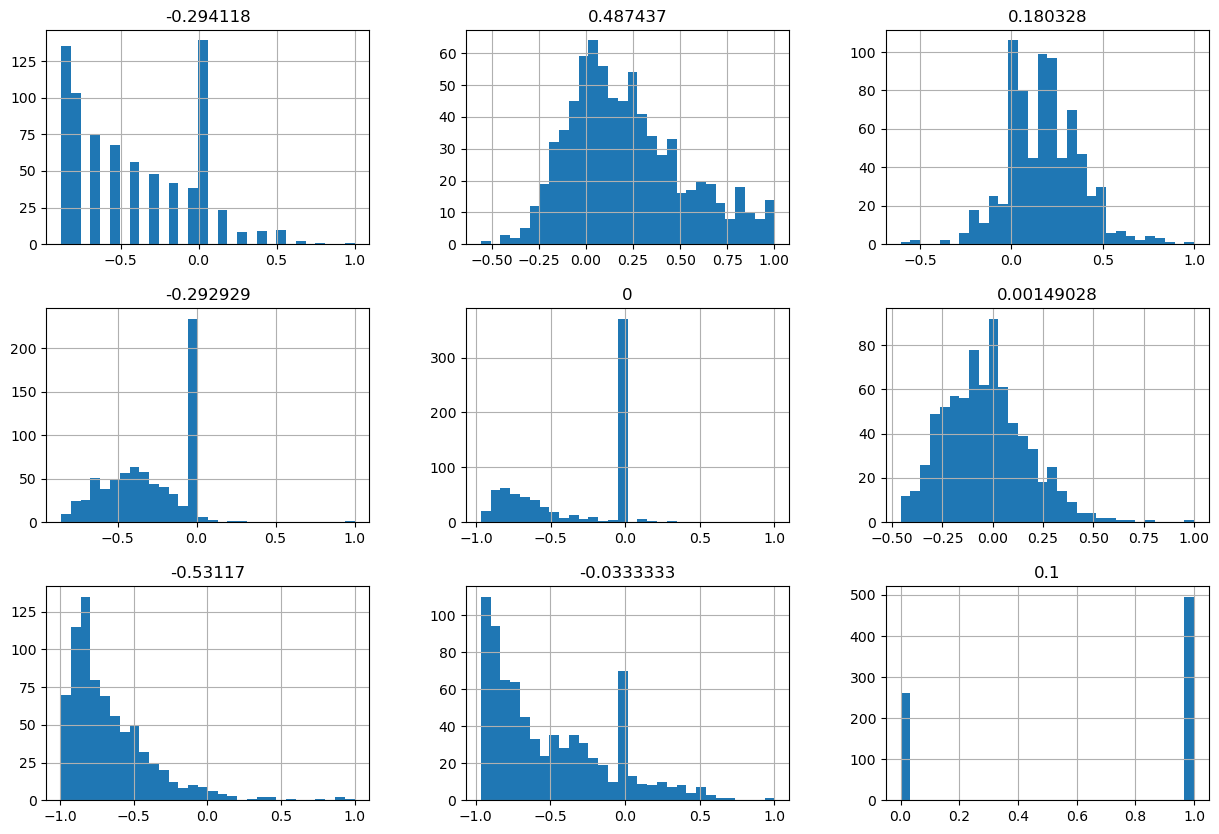

In [4]:
data.hist(bins=30, figsize=(15,10))
plt.show()

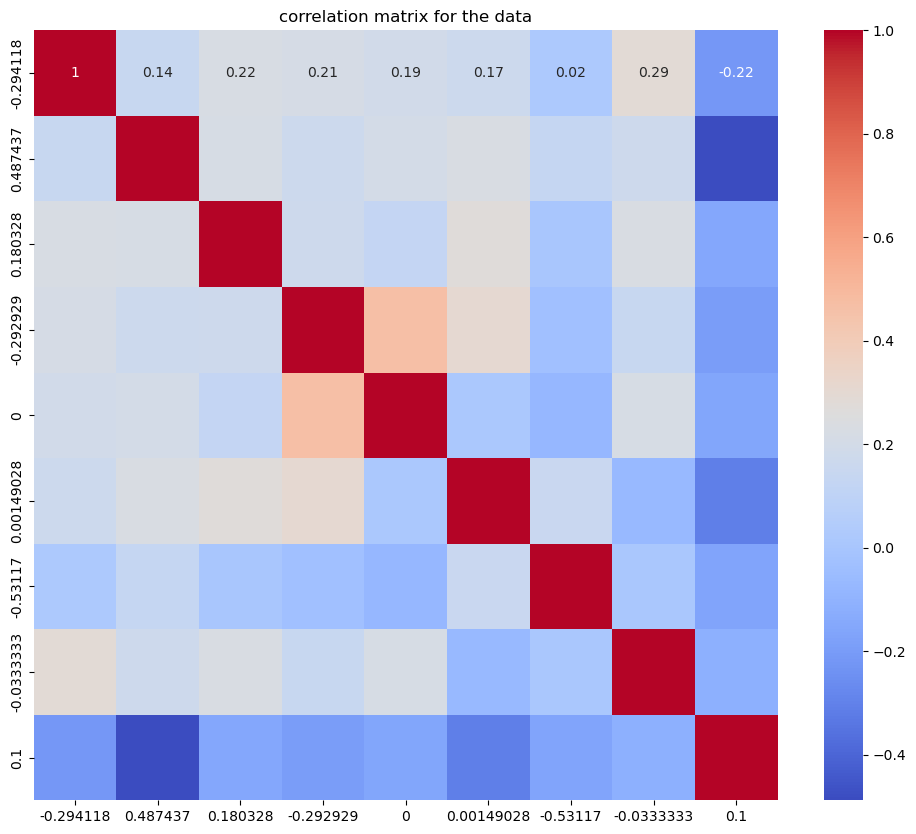

In [5]:
corr_matrix=data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix for the data')
plt.show()

In [6]:
#split

In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
#model with tensor flow

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2024-09-08 13:38:49.585344: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
30/30 [==============================] - 1s 9ms/step - loss: 0.6409 - accuracy: 0.6709 - val_loss: 0.6364 - val_accuracy: 0.6415
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6086 - accuracy: 0.6709 - val_loss: 0.6177 - val_accuracy: 0.6415
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5897 - accuracy: 0.6709 - val_loss: 0.6087 - val_accuracy: 0.6415
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5768 - accuracy: 0.6709 - val_loss: 0.5978 - val_accuracy: 0.6415
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5644 - accuracy: 0.6667 - val_loss: 0.5846 - val_accuracy: 0.6415
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.6730 - val_loss: 0.5711 - val_accuracy: 0.6415
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5379 - accuracy: 0.6813 - val_loss: 0.5557 - val_accuracy: 0.6415
Epoch 8/50
30/30 [==

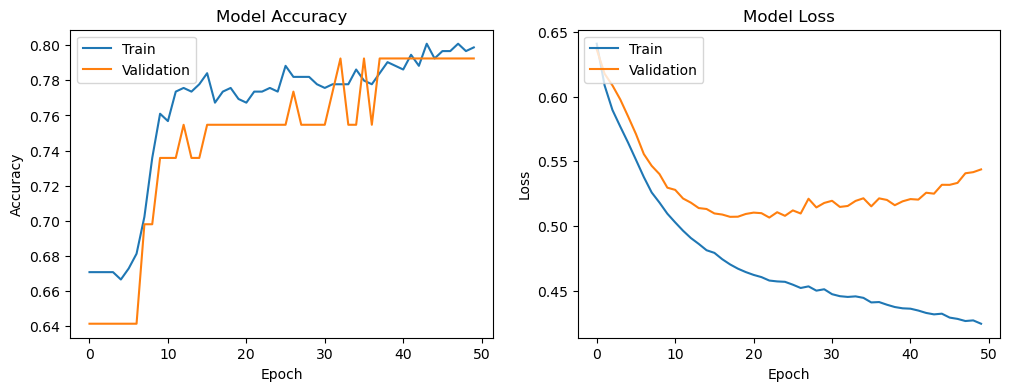

In [13]:

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [14]:
#make predicition on test data

In [15]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

8/8 [==============================] - 0s 2ms/step


In [16]:
#accuracy

Accuracy: 75.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        86
           1       0.76      0.87      0.81       142

    accuracy                           0.75       228
   macro avg       0.74      0.71      0.72       228
weighted avg       0.75      0.75      0.74       228



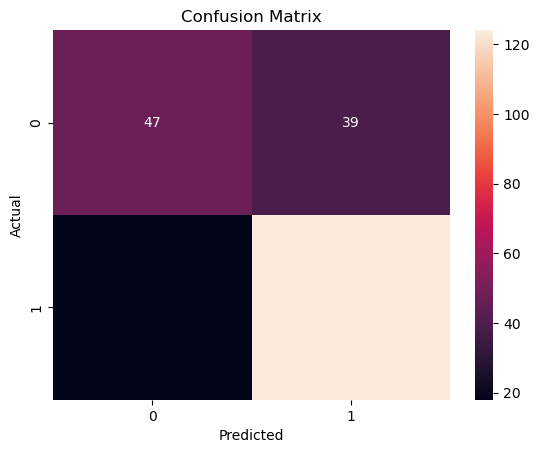

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Hypothesis:

Increasing the number of neurons and adding additional hidden layers might improve the model's performance by enabling it to learn more complex patterns in the data. Additionally, implementing dropout layers could help prevent overfitting.

In [18]:
from tensorflow.keras.layers import Dropout

#new model with more layers and neurons
model_improved = Sequential()
model_improved.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model_improved.add(Dropout(0.5))
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dropout(0.5))
model_improved.add(Dense(16, activation='relu'))
model_improved.add(Dense(1, activation='sigmoid'))


model_improved.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history_improved = model_improved.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)


Epoch 1/50
30/30 [==============================] - 1s 6ms/step - loss: 0.6857 - accuracy: 0.5220 - val_loss: 0.6534 - val_accuracy: 0.6415
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.6604 - val_loss: 0.6188 - val_accuracy: 0.6415
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.6751 - val_loss: 0.5950 - val_accuracy: 0.6415
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5824 - accuracy: 0.6625 - val_loss: 0.5798 - val_accuracy: 0.6415
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5718 - accuracy: 0.6792 - val_loss: 0.5634 - val_accuracy: 0.6604
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7149 - val_loss: 0.5449 - val_accuracy: 0.7170
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.7149 - val_loss: 0.5325 - val_accuracy: 0.7358
Epoch 8/50
30/30 [==

8/8 [==============================] - 0s 1ms/step
Improved Accuracy: 74.12%

Improved Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.55      0.61        86
           1       0.76      0.86      0.81       142

    accuracy                           0.74       228
   macro avg       0.73      0.70      0.71       228
weighted avg       0.74      0.74      0.73       228



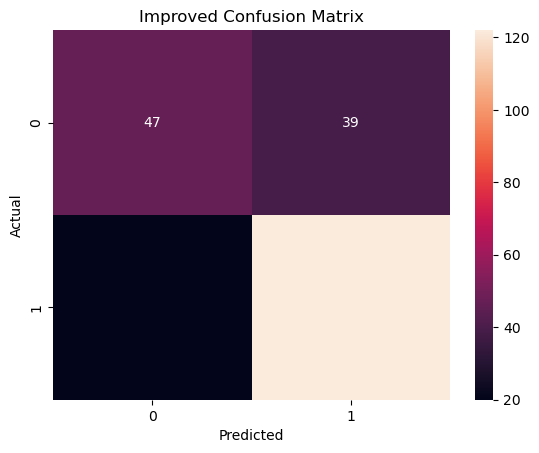

In [19]:
y_pred_improved_prob = model_improved.predict(X_test)

y_pred_improved = (y_pred_improved_prob > 0.5).astype(int).reshape(-1)

accuracy_improved = accuracy_score(y_test, y_pred_improved)
print(f"Improved Accuracy: {accuracy_improved * 100:.2f}%\n")

print("Improved Classification Report:")
print(classification_report(y_test, y_pred_improved))

conf_matrix_improved = confusion_matrix(y_test, y_pred_improved)
sns.heatmap(conf_matrix_improved, annot=True, fmt='d')
plt.title('Improved Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# result for both model:

For Class 0 (No Diabetes), PyTorch had better recall, making it more effective at identifying non-diabetic cases, though with lower precision compared to TensorFlow. TensorFlow had higher precision but missed more actual non-diabetic instances (lower recall).

For Class 1 (Diabetes), TensorFlow excelled in recall, better at identifying true diabetes cases, which is important in medical diagnoses. PyTorch had slightly better precision, meaning it was more accurate when predicting diabetes but caught fewer actual cases.

Overall, TensorFlow is more suitable for scenarios where catching all true diabetes cases is critical, while PyTorch is better for minimizing false positives and achieving a balanced performance across both classes.